In [2]:
import cv2
import numpy as np
import pprint
from pathlib import Path
from matplotlib import pyplot as plt
from BEV.bev_transform import BEV
from src.cap_aug import CAP_AUG
from src.utils import show_image, draw_bboxes

# Load data

## Load destination image

In [3]:
DEST_DATASET_ROOT = Path('example_images/')

In [4]:
# dest_image_name = 'img_174124862194.png'
dest_image_name = 'img_900983.png'

dest_image_name = DEST_DATASET_ROOT / dest_image_name
image = cv2.imread(str(dest_image_name))

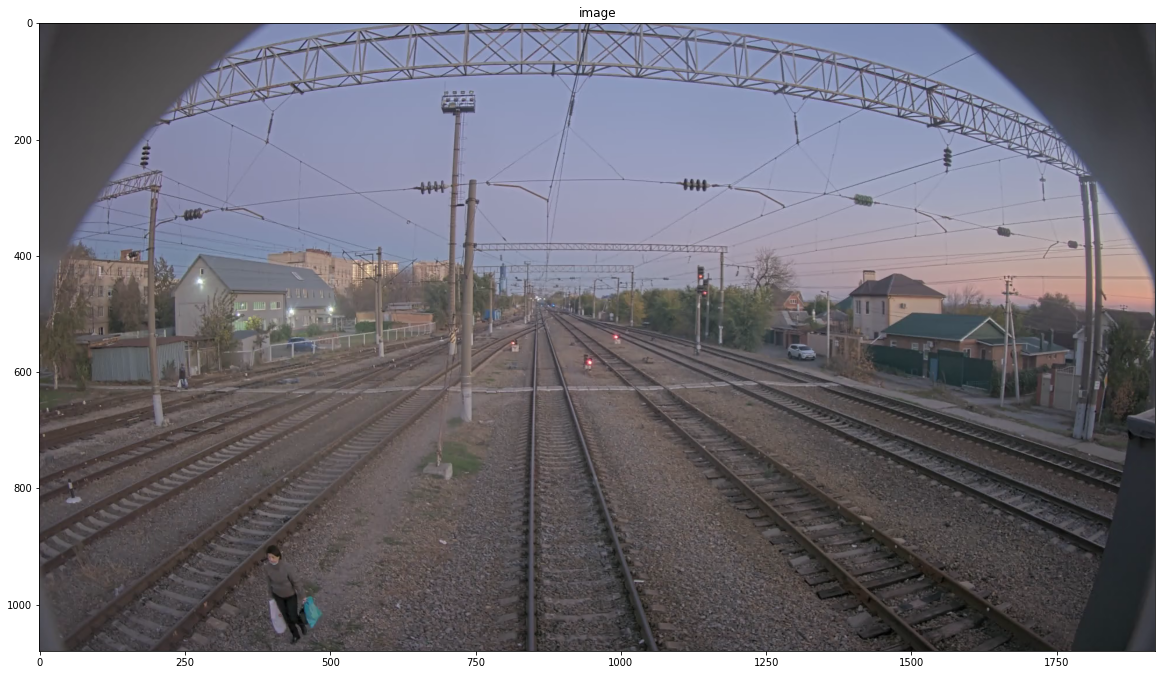

In [5]:
show_image(image)

## Get list of source images

In [6]:
HUMAN_DATASET_ROOT = Path('data/human_dataset_filtered/')
SOURCE_IMAGES = sorted(list(HUMAN_DATASET_ROOT.glob('*.png')))

# Bird's-eye view transformation

In [7]:
# Extrinsic camera parameters
camera_info = {'pitch' : -2 ,
               'yaw' : 0 ,
               'roll' : 0 ,
               'tx' : 0,
               'ty' : 5,
               'tz' : 0,
               'output_w': 1000, # output bev image shape
               'output_h': 1000}
calib_yaml_path=None # path to intrinsic parameters (see example in BEV/camera_intrinsic_params.yaml file)
                     # if calib_yaml_path is None, intrinsic params will be loaded from BEV/camera_intrinsic_params.yaml

bev_transform = BEV(camera_info=camera_info,
                    calib_yaml_path=calib_yaml_path)

## BEV image transformation

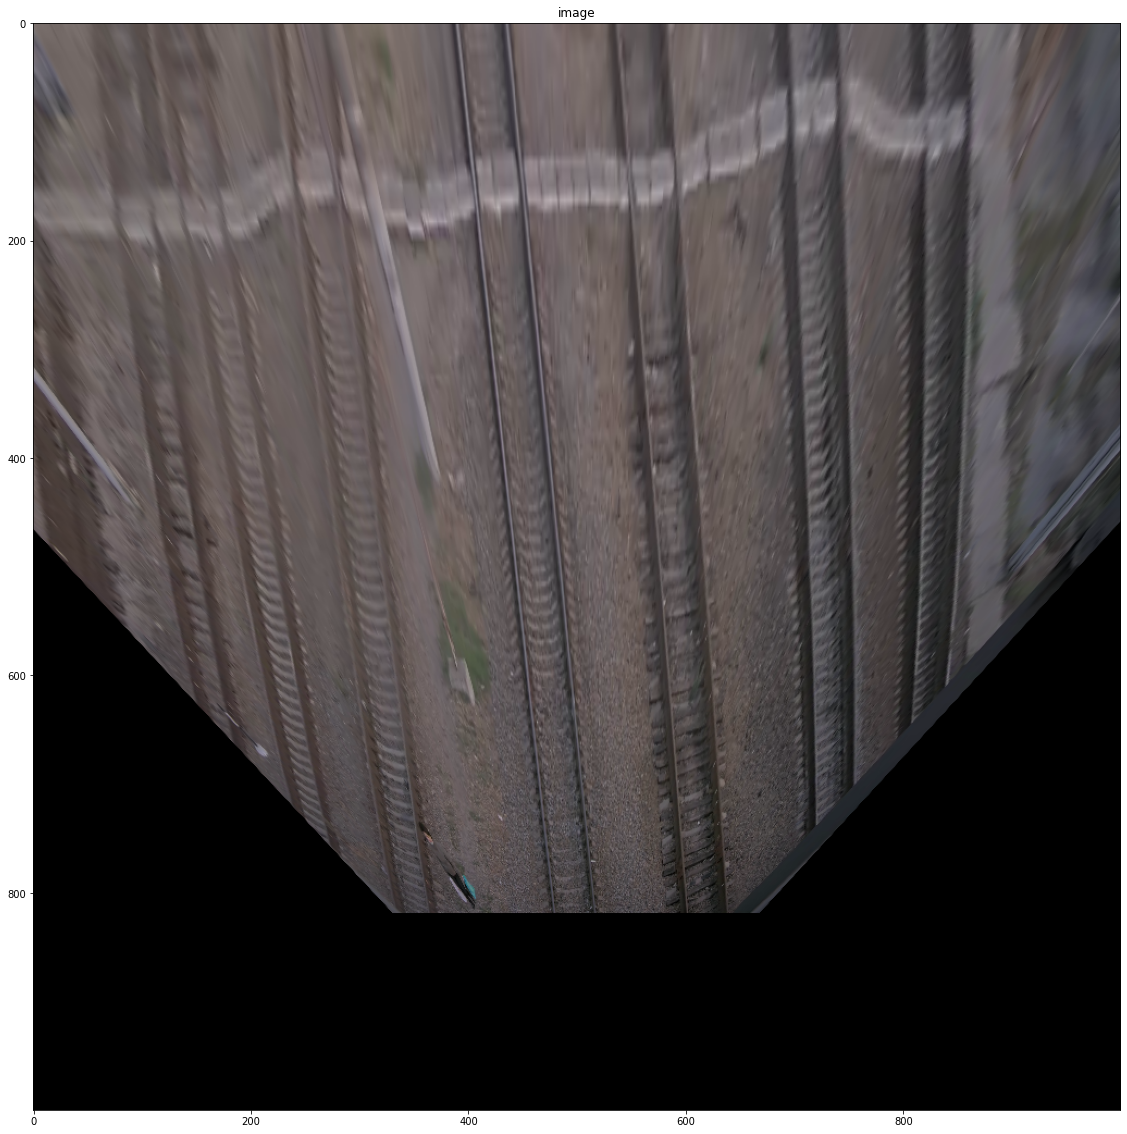

In [8]:
bev_image = bev_transform(image)
show_image(bev_image)

# CAP augmentation examples

## Example with BEV

In [25]:
cap_aug = CAP_AUG(SOURCE_IMAGES, bev_transform=bev_transform, 
                                               n_objects_range=[50,80], 
                                               h_range=[2.0, 2.5],
                                               x_range=[-25, 25],
                                               y_range=[0 ,100])

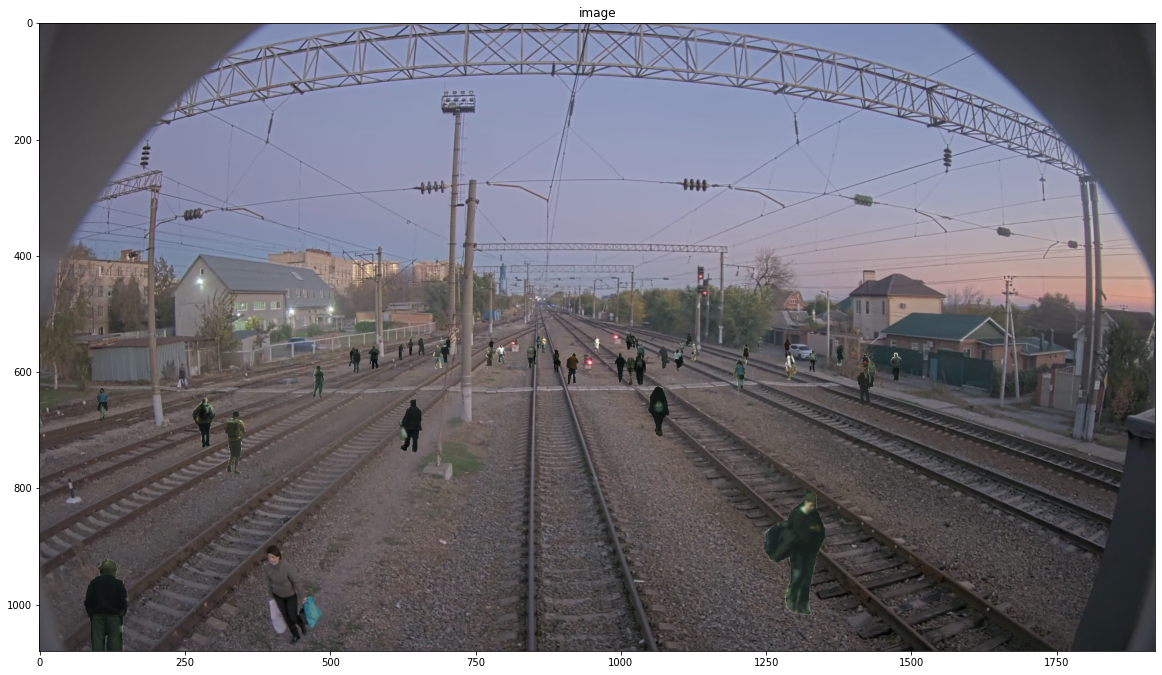

In [26]:
result_image, result_coords = cap_aug(image)
show_image(result_image)

In [27]:
# cv2.imwrite('example_images/result.png', result_image)

True

### Draw bounding boxes

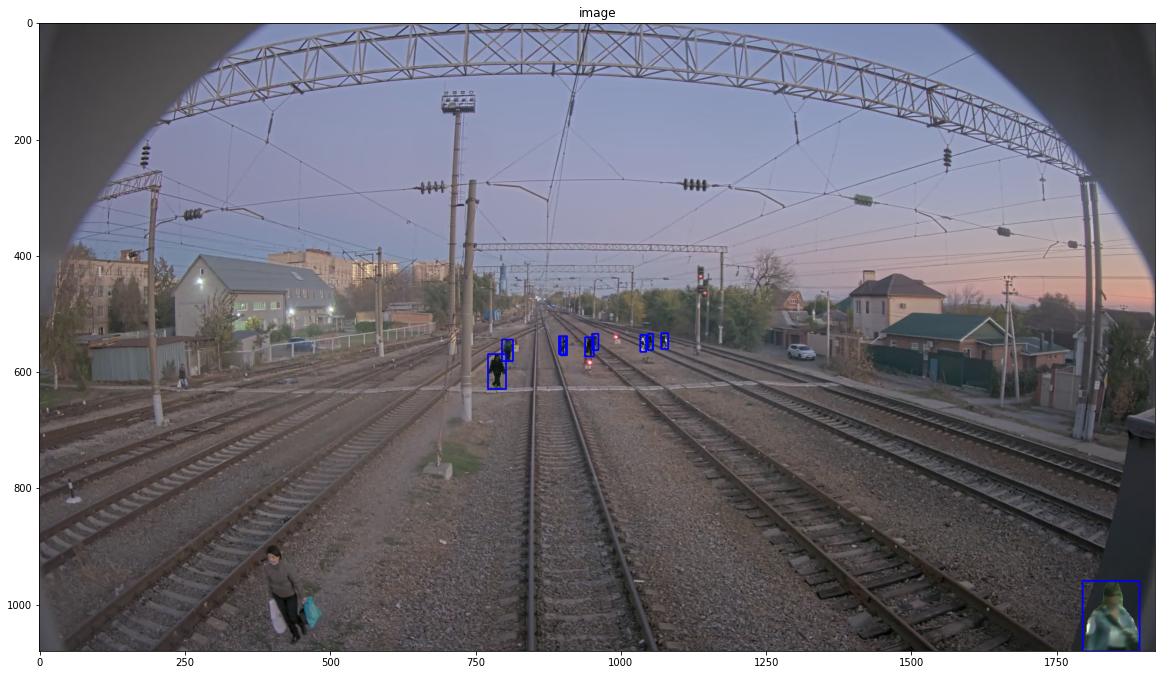

In [10]:
draw_bboxes(result_image, result_coords)
show_image(result_image)

## Example in pixel coordinates

Note : If bev_transform parameter is None, then x_range and y_range must be a list of integers and these parameters will mean range in x and y axis in the image coordinate system. h_range parameter also must be a list of interegers (pixel sizes of images)

In [11]:
cap_aug_pixels = CAP_AUG(SOURCE_IMAGES,  bev_transform=None, 
                                               n_objects_range=[10,20], 
                                               h_range=[100,101],
                                               x_range=[500, 1500],
                                               y_range=[600 ,1000])

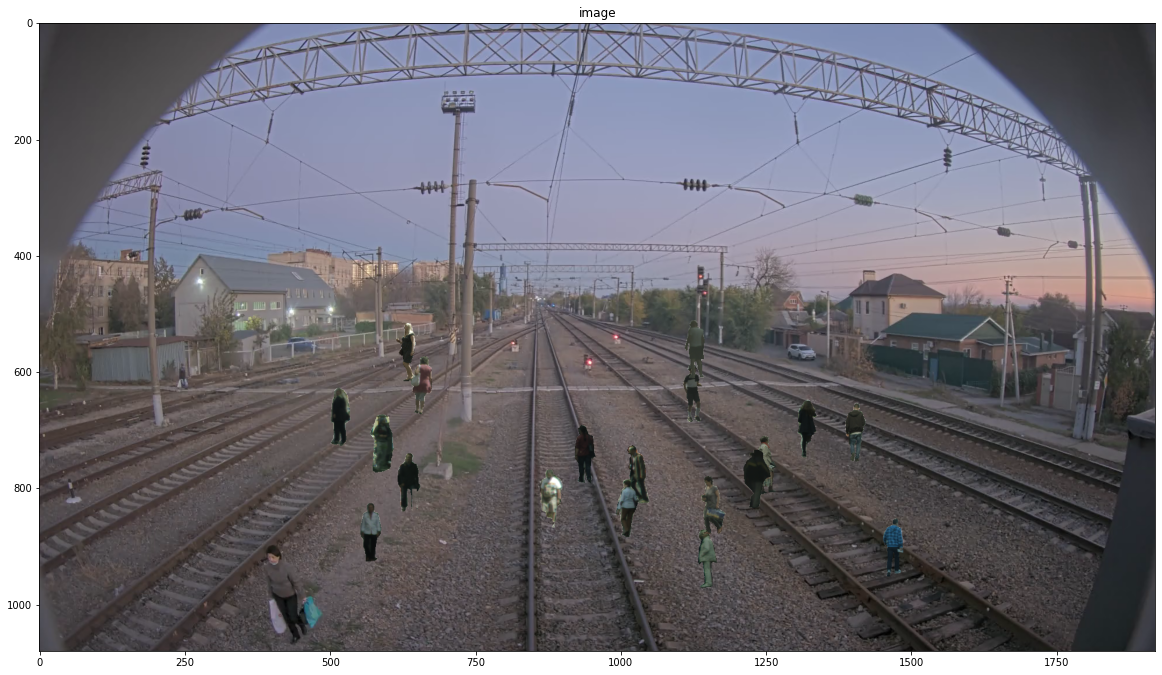

In [13]:
result_image, result_coords = cap_aug_pixels(image)
show_image(result_image)

### Draw bounding boxes

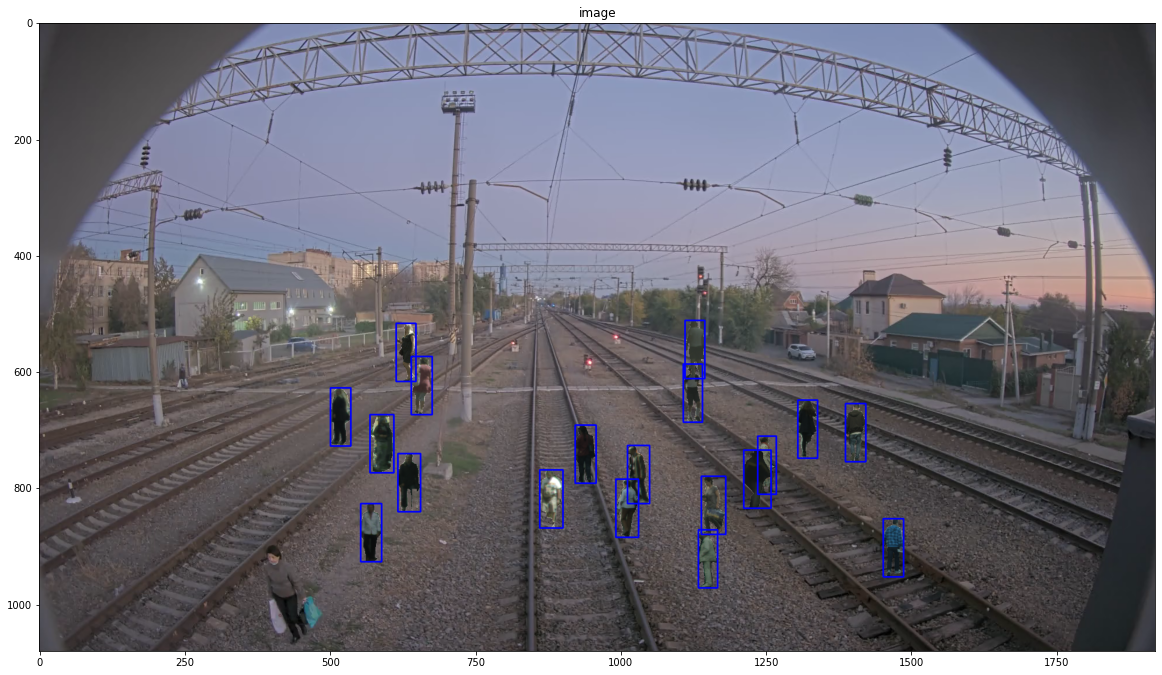

In [14]:
draw_bboxes(result_image, result_coords)
show_image(result_image)